data analysis
Dataset Length:  499
Dataset Shape:  (499, 5)
Dataset:
        Rollnumber    subject  mid1  mid2 sem
0    16031A05501      maths    23     1   D
1    16031A05502  chemistry    24     2   D
2    16031A05503     physis    22     3   D
3    16031A05504      maths    23     4   D
4    16031A05505     physis    25    25   A
..           ...        ...   ...   ...  ..
494  16031A05995  chemistry    30     1   C
495  16031A05996     physis    30     2   C
496  16031A05997      maths    30     3   B
497  16031A05998     physis    30     4   C
498  16031A05999     physis    30    20   C

[499 rows x 5 columns]
Testingdata:
     Rollnumber    subject  mid1  mid2
0   16031A0551      maths    11    25
1   16031A0552  chemistry    12    26
2   16031A0553     physis    13    27
3   16031A0554      maths    30    30
4   16031A0555     physis    15    11
5   16031A0556      maths    16    12
6   16031A0557  chemistry    17    13
7   16031A0558     physis    18    24
8   16031A0559      m

<IPython.core.display.Javascript object>


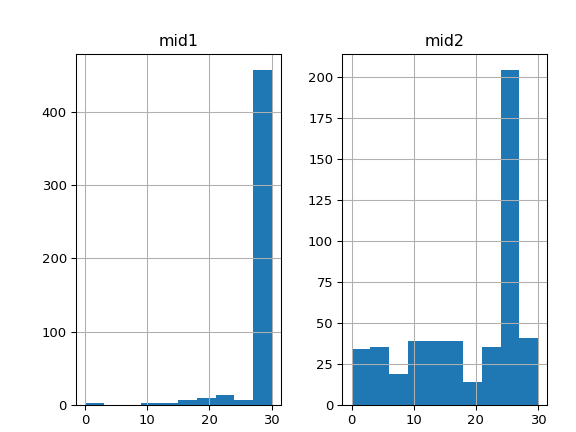

<IPython.core.display.Javascript object>


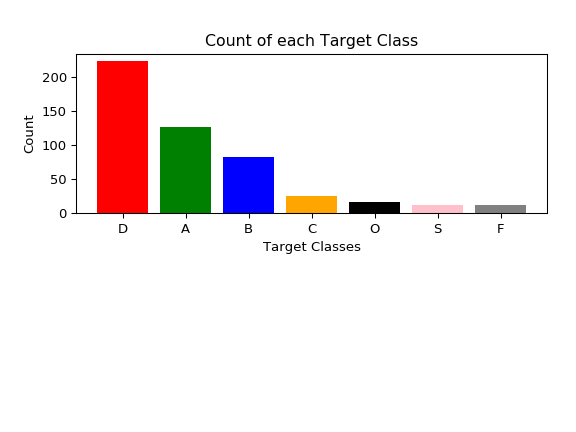

<IPython.core.display.Javascript object>


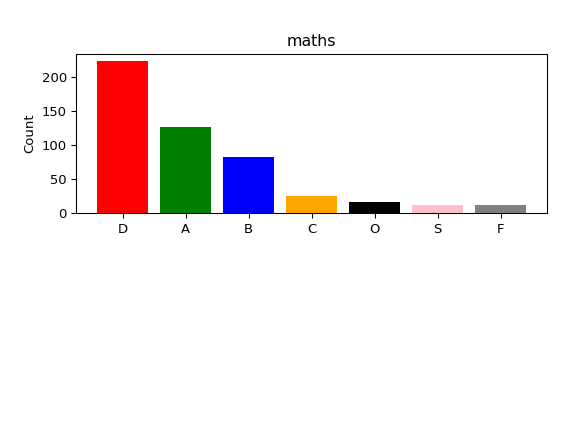

<IPython.core.display.Javascript object>


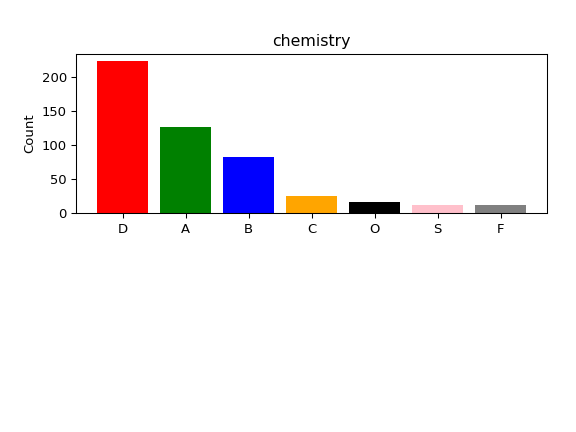

<IPython.core.display.Javascript object>


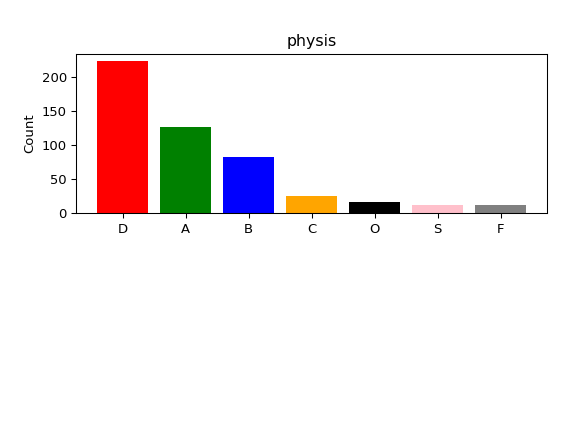

[26, 473]


<IPython.core.display.Javascript object>


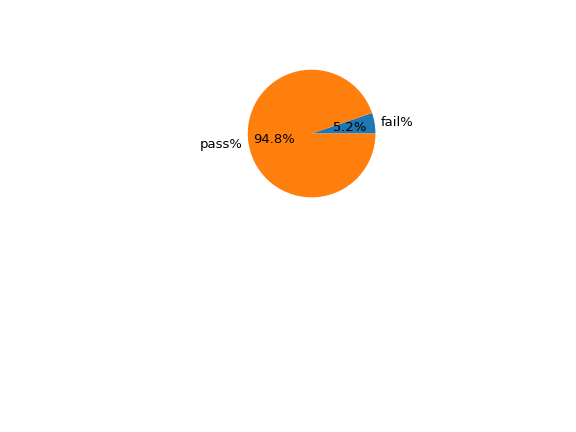

Results Using Gini Index:
Predicted values:
[2 1 0 2 1 2 1 5 2 2 4 4 3 2 1 2 2 2 2 4 5 1 3 2 3 3 0 1 3 3 2 2 3 1 3 6 4
 3 3 1 1 1 3 4 2 2 2 1 0 2 3 2 2 3 3 3 2 2 2 2 3 2 3 2 1 1 1 1 1 1 2 4 2 3
 3 2 3 3 2 2 1 3 6 1 2 3 3 3 2 2 2 2 2 5 3 2 2 2 3 2 1 3 6 0 3 3 2 5 2 3 4
 2 2 4 2 2 2 1 3 1 3 1 0 4 2 6 2 2 6 3 0 3 2 3 3 3 1 1 3 2 2 2 3 2 1 1 1 5
 1 2]
['C', 'B', 'A', 'C', 'B', 'C', 'B', 'O', 'C', 'C', 'F', 'F', 'D', 'C', 'B', 'C', 'C', 'C', 'C', 'F', 'O', 'B', 'D', 'C', 'D', 'D', 'A', 'B', 'D', 'D', 'C', 'C', 'D', 'B', 'D', 'S', 'F', 'D', 'D', 'B', 'B', 'B', 'D', 'F', 'C', 'C', 'C', 'B', 'A', 'C', 'D', 'C', 'C', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'D', 'C', 'D', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'F', 'C', 'D', 'D', 'C', 'D', 'D', 'C', 'C', 'B', 'D', 'S', 'B', 'C', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'C', 'O', 'D', 'C', 'C', 'C', 'D', 'C', 'B', 'D', 'S', 'A', 'D', 'D', 'C', 'O', 'C', 'D', 'F', 'C', 'C', 'F', 'C', 'C', 'C', 'B', 'D', 'B', 'D', 'B', 'A', 'F', 'C', 'S', 'C', 'C', 'S', 'D',

<IPython.core.display.Javascript object>


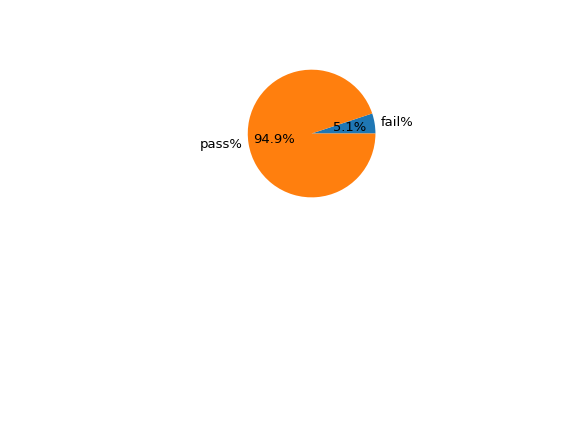

    Rollnumber    subject GRADE
0   16031A0551      maths     S
1   16031A0552  chemistry     S
2   16031A0553     physis     S
3   16031A0554      maths     S
4   16031A0555     physis     A
5   16031A0556      maths     B
6   16031A0557  chemistry     C
7   16031A0558     physis     S
8   16031A0559      maths     D
9   16031A0560      maths     F
10  16031A0561  chemistry     O
11  16031A0562     physis     S
12  16031A0563      maths     S
13  16031A0564     physis     D
14  16031A0565      maths     C
15  16031A0566  chemistry     S
16  16031A0567     physis     S
17  16031A0568      maths     S
18  16031A0569      maths     S
19  16031A0570  chemistry     S
20  16031A0571     physis     S
21  16031A0572      maths     S
22  16031A0573  chemistry     S
23  16031A0574     physis     S
24  16031A0575      maths     S
25  16031A0576     physis     A
26  16031A0577      maths     B
27  16031A0578  chemistry     C
28  16031A0579     physis     S
29  16031A0580      maths     D
30  1603

<IPython.core.display.Javascript object>


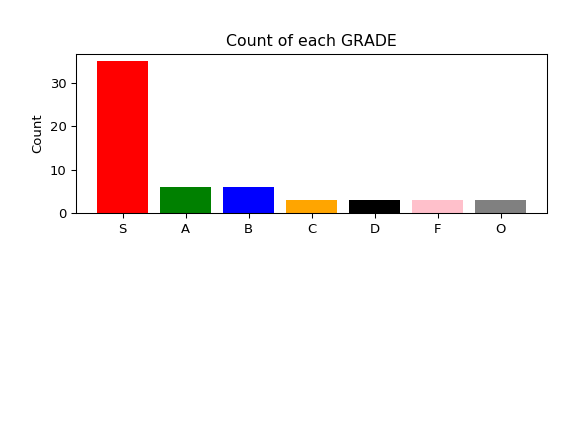

<IPython.core.display.Javascript object>


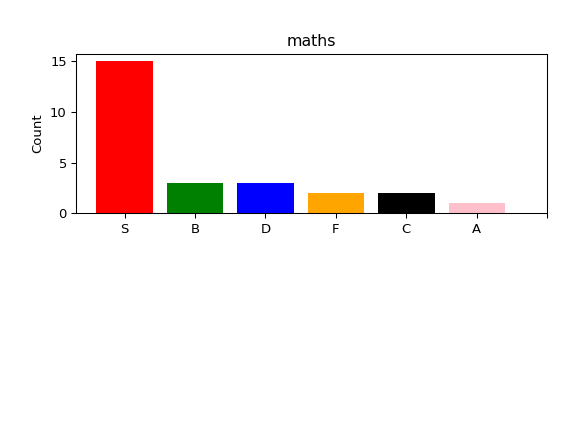

<IPython.core.display.Javascript object>


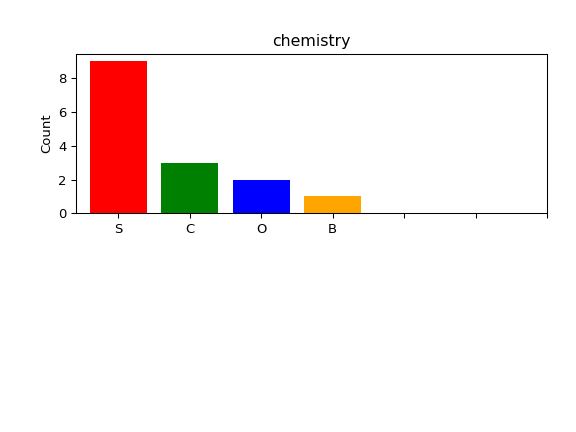

<IPython.core.display.Javascript object>


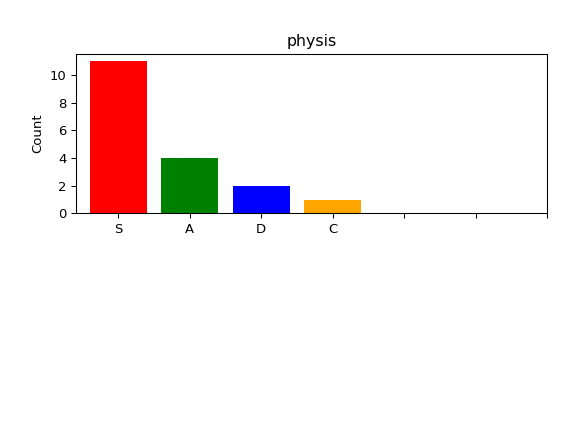

Results Using Entropy for inputdataset:
Predicted values:
[5 5 5 5 0 1 2 5 3 4 5 5 5 3 2 5 5 5 5 5 5 5 5 5 5 0 1 2 5 3 4 5 5 5 3 2 5
 5 5 5 5 5 5 5 5 5 0 1 2 5 3 4 5 5 5 3 2 5 5]
['O', 'O', 'O', 'O', 'A', 'B', 'C', 'O', 'D', 'F', 'O', 'O', 'O', 'D', 'C', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'A', 'B', 'C', 'O', 'D', 'F', 'O', 'O', 'O', 'D', 'C', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'A', 'B', 'C', 'O', 'D', 'F', 'O', 'O', 'O', 'D', 'C', 'O', 'O']
[3, 56]


<IPython.core.display.Javascript object>


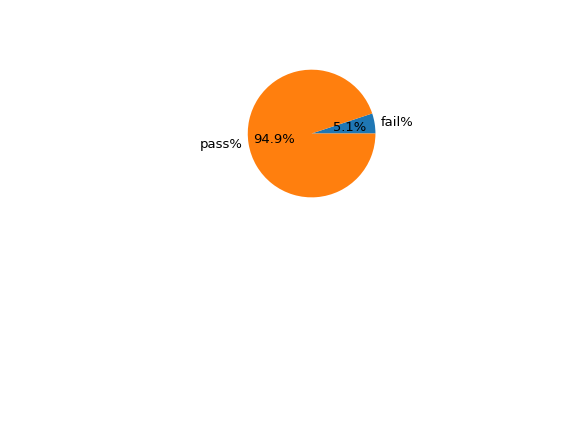

    Rollnumber    subject GRADE
0   16031A0551      maths     O
1   16031A0552  chemistry     O
2   16031A0553     physis     O
3   16031A0554      maths     O
4   16031A0555     physis     A
5   16031A0556      maths     B
6   16031A0557  chemistry     C
7   16031A0558     physis     O
8   16031A0559      maths     D
9   16031A0560      maths     F
10  16031A0561  chemistry     O
11  16031A0562     physis     O
12  16031A0563      maths     O
13  16031A0564     physis     D
14  16031A0565      maths     C
15  16031A0566  chemistry     O
16  16031A0567     physis     O
17  16031A0568      maths     O
18  16031A0569      maths     O
19  16031A0570  chemistry     O
20  16031A0571     physis     O
21  16031A0572      maths     O
22  16031A0573  chemistry     O
23  16031A0574     physis     O
24  16031A0575      maths     O
25  16031A0576     physis     A
26  16031A0577      maths     B
27  16031A0578  chemistry     C
28  16031A0579     physis     O
29  16031A0580      maths     D
30  1603

<IPython.core.display.Javascript object>


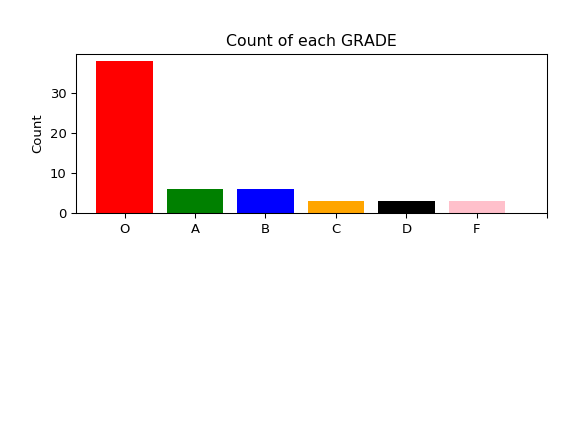

<IPython.core.display.Javascript object>


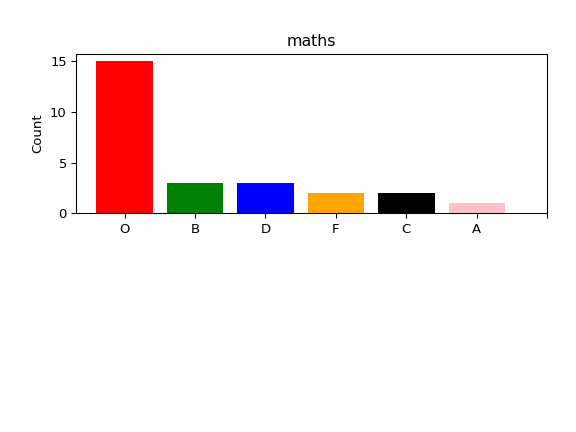

<IPython.core.display.Javascript object>


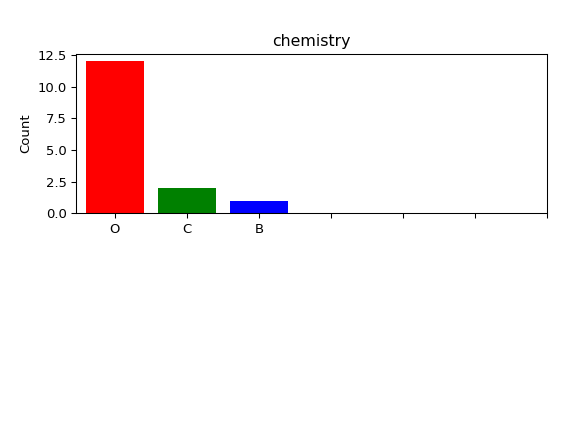

<IPython.core.display.Javascript object>


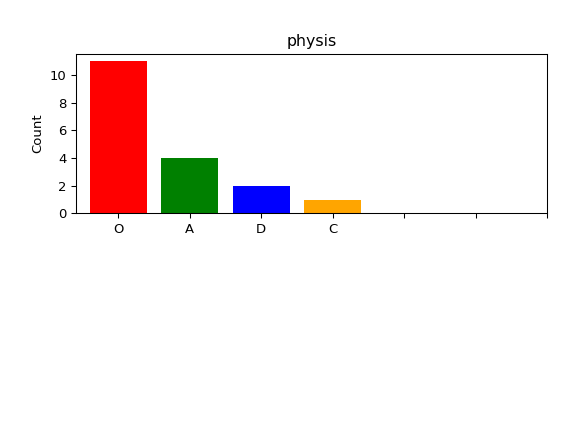

In [1]:
import cgitb 
cgitb.enable()
#start_response('200 OK',[('Content-Type','text/html')])
# Importing the required packages 
import numpy as np 
import pandas as pd 
#import pymysql
from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn import preprocessing
%matplotlib notebook
import matplotlib.pyplot as plt, mpld3
from matplotlib import rcParams
from matplotlib.cm import rainbow
#conn = pymysql.connect(host="localhost",user="root",password="",db="student" )
engine = create_engine('mysql+pymysql://root:@localhost/student')
con = engine.connect()
#mycursor = conn.cursor()
# Function importing Dataset 
def importdata(): 
    balance_data = pd.read_excel('dataset.xlsx') 
    data_tests=pd.read_excel('testdata.xlsx')
   
    original=data_tests
    print("data analysis")
    # Printing the dataswet shape 
    print ("Dataset Length: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
    
    # Printing the dataset obseravtions 
    print ("Dataset:\n ",balance_data) 
    print("Testingdata:\n",data_tests)
    balance_data.hist()
    plt.figure()
    plt.subplot(2,1,1)
    plt.bar(balance_data['sem'].unique(), balance_data['sem'].value_counts(), color = ['red', 'green','blue','orange','black','pink','gray'])
    plt.xticks([0, 1,2,3,4,5,6])
    plt.xlabel('Target Classes')
    plt.ylabel('Count')
    plt.title('Count of each Target Class')
    #mpld3.show()
    sub=balance_data['subject'].unique()
    for i in sub:
        df2 = balance_data[balance_data['subject'].str.contains(i)]
        plt.figure()
        plt.subplot(2,1,1)
        plt.bar(balance_data['sem'].unique(), balance_data['sem'].value_counts(), color = ['red', 'green','blue','orange','black','pink','gray'])
        plt.xticks([0, 1,2,3,4,5,6])
        plt.ylabel('Count')
        plt.title(i)
    w1=len(balance_data)
    lis1=[]
    bal=list(balance_data['sem'])
    #print(bal)
    f1=bal.count('F')
    lis1.append(f1)
    pas1=w1-f1
    lis1.append(pas1)
    print(lis1)
    labelss1=['fail%','pass%']
    plt.figure()
    plt.subplot(2,1,1)
    plt.pie(lis1, labels=labelss1, startangle=0, autopct='%.1f%%')
    plt.show()
    le = preprocessing.LabelEncoder()
    balance_data = balance_data.apply(le.fit_transform)
    data_tests = data_tests.apply(le.fit_transform)
    #print(balance_data)
    return original,balance_data,data_tests

# Function to split the dataset 
def splitdataset(balance_data): 

    # Separating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 4]
    #print(X)
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  X, Y, test_size = 0.3, random_state = 100) 
    return X, Y, X_train, X_test, y_train, y_test 

# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train,y_test): 
    
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, min_samples_leaf=2) 
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
    

# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 

    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 2) 
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 


# Function to make predictions 
def prediction(X_test, clf_object): 

    # Predicton on test with giniIndex 
    pred=[]
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred)
    for i in y_pred:
        if(i==0):
            pred.append('A')
        elif(i==1):
            pred.append('B')
        elif(i==2):
            pred.append('C')
        elif(i==3):
            pred.append('D')
        elif(i==4):
            pred.append('F')
        elif(i==6):
            pred.append('S')
        else:
            pred.append('O')
    print(pred)
    return y_pred 
def predictionres(data_test, clf_object,originaldata): 

    # Predicton on test with giniIndex 
    datapred=[]
    datay_pred = clf_object.predict(data_test) 
    print("Predicted values:") 
    print(datay_pred)
    for i in datay_pred:
        if(i==0):
            datapred.append('A')
        elif(i==1):
            datapred.append('B')
        elif(i==2):
            datapred.append('C')
        elif(i==3):
            datapred.append('D')
        elif(i==4):
            datapred.append('F')
        elif(i==6):
            datapred.append('S')
        else:
            datapred.append('O')
    print(datapred)
    w=len(datapred)
    lis=[]
    f=datapred.count('F')
    lis.append(f)
    pas=w-f
    lis.append(pas)
    print(lis)
    labelss=['fail%','pass%']
    plt.figure()
    plt.subplot(2,1,1)
    plt.pie(lis, labels=labelss, startangle=0, autopct='%.1f%%')
    plt.show()
    df1 = pd.DataFrame(originaldata)
    df1['GRADE']=np.array(datapred)
    print(df1[['Rollnumber', 'subject','GRADE']])
    df1.to_sql('results',con, if_exists='replace', index = False)
    plt.figure()
    plt.subplot(2,1,1)
    plt.bar(df1['GRADE'].unique(), df1['GRADE'].value_counts(), color = ['red', 'green','blue','orange','black','pink','gray'])
    plt.xticks([0, 1,2,3,4,5,6])
    plt.ylabel('Count')
    plt.title('Count of each GRADE')
    sub=df1['subject'].unique()
    for i in sub:
        df2 = df1[df1['subject'].str.contains(i)]
        plt.figure()
        plt.subplot(2,1,1)
        plt.bar(df2['GRADE'].unique(), df2['GRADE'].value_counts(), color = ['red', 'green','blue','orange','black','pink','gray'])
        plt.xticks([0, 1,2,3,4,5,6])
        plt.ylabel('Count')
        plt.title(i)
        
        
    return datay_pred 

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 

    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred)) 
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
    print("Report : \n",classification_report(y_test, y_pred,labels=np.unique(y_pred))) 

# Driver code 
def main(): 

 # Building Phase 
    originaldata,data,data_test = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train,y_test) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 

 # Operational Phase 
    print("Results Using Gini Index:") 

    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
    
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
    #prediction for testdata
    print("Results Using Gini Index for inputdataset:")
    predictionres(data_test,clf_gini,originaldata)
    print("Results Using Entropy for inputdataset:")
    predictionres(data_test,clf_entropy,originaldata)

# Calling main function 
if __name__=="__main__": 
       main()

